In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import numpy as np
import pandas as pd
import anndata as ad
from scipy import sparse
import cell2location

f:\anaconda\envs\scvi-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
f:\anaconda\envs\scvi-env\lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")
f:\anaconda\envs\scvi-env\lib\site-packages\scvi\_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
f:\anaconda\envs\scvi-env\lib\site-packages\scvi\_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
f:\anaconda\envs\scvi-env\lib\site-packages\umap\distances.py:1063: NumbaDeprecat

In [2]:
# import tensorflow as tf

# if tf.test.gpu_device_name():
#     print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
# else:
#     print("Please install GPU version of TF")


In [2]:
samples_dict = {"CTR": "CTR", "AAV": "AAV"}

In [4]:
sc.settings.verbosity = 3  
# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white', frameon=True, figsize=(5, 5))

In [5]:
adata_ref = sc.read_h5ad("Integrate/scRNA_cellcall.h5ad")
adata_ref

AnnData object with n_obs × n_vars = 27996 × 23657
    obs: 'nGene', 'nUMI', 'fraction.mito', 'condition', 'dominant_index', 'percent_dominant', 'Level0', 'doubletSimScore', 'mouse', 'Level1', 'Level2', 'nCount_RNA', 'nFeature_RNA', 'aucs', 'group', 'RNA_snn_res.0.45', 'seurat_clusters', 'RNA_snn_res.0.2', 'RNA_snn_res.0.4', 'Myeloid_subtype'
    var: 'name'

In [6]:
adata_ref.obs[["Level0","group"]].value_counts()

Level0       group       
Granulosa    Granulosa       14231
Mesenchyme   Mesenchyme       8934
Endothelium  Endothelium      2668
Epithelium   Epithelium        845
Immune       Gpnmb-Mac         774
             Other_Immune      382
             Gpnmb+Mac         149
Oocyte       Oocyte             13
dtype: int64

In [7]:
adata_ref.X.max()

4.481571802097692

In [8]:
import numpy as np
from scipy.sparse import csc_matrix

# 假设你已经有一个 anndata 对象 adata_ref

# 将稀疏矩阵转换为密集矩阵
dense_matrix = adata_ref.X.toarray()

# 进行 e^X - 1 操作并取整
transformed_matrix = np.floor(np.expm1(dense_matrix))

# 如果你需要将结果存回为稀疏矩阵
adata_ref.X = csc_matrix(transformed_matrix)

# 检查操作后的矩阵是否符合预期
print(adata_ref.X.max(), adata_ref.X.min())



87.0 0.0


In [9]:
adata_ref.write_h5ad("Integrate/scRNA_ref.h5ad")

In [10]:
ovary_adata_sc = sc.read_h5ad("Integrate/scRNA_ref.h5ad")
ovary_adata_sc

AnnData object with n_obs × n_vars = 27996 × 23657
    obs: 'nGene', 'nUMI', 'fraction.mito', 'condition', 'dominant_index', 'percent_dominant', 'Level0', 'doubletSimScore', 'mouse', 'Level1', 'Level2', 'nCount_RNA', 'nFeature_RNA', 'aucs', 'group', 'RNA_snn_res.0.45', 'seurat_clusters', 'RNA_snn_res.0.2', 'RNA_snn_res.0.4', 'Myeloid_subtype'
    var: 'name'

f:\anaconda\envs\scvi-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
f:\anaconda\envs\scvi-env\lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")
f:\anaconda\envs\scvi-env\lib\site-packages\scvi\_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
f:\anaconda\envs\scvi-env\lib\site-packages\scvi\_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
f:\anaconda\envs\scvi-env\lib\site-packages\umap\distances.py:1063: NumbaDeprecat

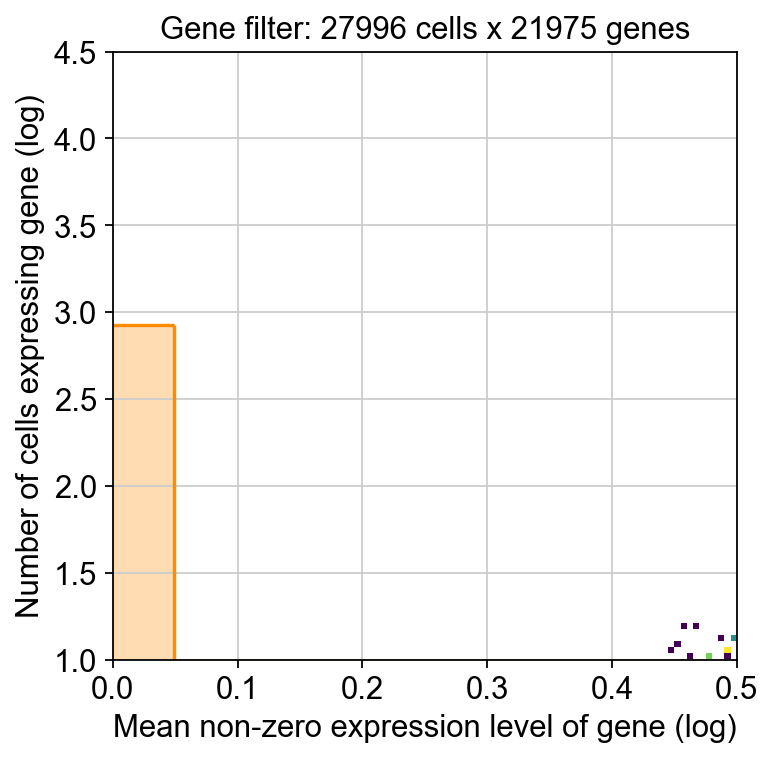

In [11]:
from cell2location.utils.filtering import filter_genes
selected = filter_genes(ovary_adata_sc, cell_count_cutoff=5, cell_percentage_cutoff2=0.03, nonz_mean_cutoff=1.12)
# %notebook filter the object
ovary_adata_sc = ovary_adata_sc[:, selected].copy()

In [12]:
ovary_adata_sc.obs.columns

Index(['nGene', 'nUMI', 'fraction.mito', 'condition', 'dominant_index',
       'percent_dominant', 'Level0', 'doubletSimScore', 'mouse', 'Level1',
       'Level2', 'nCount_RNA', 'nFeature_RNA', 'aucs', 'group',
       'RNA_snn_res.0.45', 'seurat_clusters', 'RNA_snn_res.0.2',
       'RNA_snn_res.0.4', 'Myeloid_subtype'],
      dtype='object')

In [13]:
ovary_adata_sc.obs["mouse"].value_counts()

4E    2656
2B    2612
1E    2482
1B    2397
2A    2383
4D    2280
3B    1941
2C    1900
3A    1715
3E    1571
5A    1425
4B    1385
5C    1102
1A    1099
1D    1027
1C      21
Name: mouse, dtype: int64

In [14]:
# prepare anndata for the regression model
import cell2location
cell2location.models.RegressionModel.setup_anndata(adata=ovary_adata_sc,
                        # 10X reaction / sample / batch
                        batch_key='mouse',
                        # cell type, covariate used for constructing signatures
                        labels_key='Level0')

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


f:\anaconda\envs\scvi-env\lib\site-packages\scvi\data\fields\_layer_field.py:101: UserWarning: Training will be faster when sparse matrix is formatted as CSR. It is safe to cast before model initialization.
  _verify_and_correct_data_format(adata, self.attr_name, self.attr_key)


In [15]:
from cell2location.models import RegressionModel
mod = RegressionModel(ovary_adata_sc)

# view anndata_setup as a sanity check
mod.view_anndata_setup()

Anndata setup with scvi-tools version 1.0.3.

Setup via `RegressionModel.setup_anndata` with arguments:

{
│   'layer': None,
│   'batch_key': 'mouse',
│   'labels_key': 'Level0',
│   'categorical_covariate_keys': None,
│   'continuous_covariate_keys': None
}

         Summary Statistics         
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃     Summary Stat Key     ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│         n_batch          │  16   │
│         n_cells          │ 27996 │
│ n_extra_categorical_covs │   0   │
│ n_extra_continuous_covs  │   0   │
│         n_labels         │   6   │
│          n_vars          │ 21975 │
└──────────────────────────┴───────┘

               Data Registry                
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Registry Key ┃    scvi-tools Location    ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      X       │          adata.X          │
│    batch     │ adata.obs['_scvi_batch']  │
│    ind_x     │   adata.obs['_indices']   │
│    labels    │ adata.obs['_scvi_labels'] │
└──────────────┴───────────────────────────┘

                  batch State Registry                   
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃  Source Location   ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['mouse'] │     1A     │          0          │
│                    │     1B     │          1          │
│                    │     1C     │          2          │
│                    │     1D     │          3          │
│                    │     1E     │          4          │
│                    │     2A     │          5          │
│                    │     2B     │          6          │
│                    │     2C     │          7          │
│                    │     3A     │          8          │
│                    │     3B     │          9          │
│                    │     3E     │         10          │
│                    │     4B     │         11          │
│                    │     4D     │         12          │
│                    │     4E     │         13          │
│                    │     5A     │         14          │
│                    │     5C     │         15          │
└────────────────────┴────────────┴─────────────────────┘

                   labels State Registry                   
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃   Source Location   ┃ Categories  ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['Level0'] │   Immune    │          0          │
│                     │  Granulosa  │          1          │
│                     │ Mesenchyme  │          2          │
│                     │ Endothelium │          3          │
│                     │ Epithelium  │          4          │
│                     │   Oocyte    │          5          │
└─────────────────────┴─────────────┴─────────────────────┘

In [17]:
mod.train(max_epochs=250)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
f:\anaconda\envs\scvi-env\lib\site-packages\lightning\pytorch\trainer\configuration_validator.py:69: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
  rank_zero_warn("You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.")
You are using a CUDA device ('NVIDIA GeForce RTX 3080') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 250/250: 100%|██████████| 250/250 [20:50<00:00,  5.05s/it, v_num=1, elbo_train=2.26e+8]

`Trainer.fit` stopped: `max_epochs=250` reached.


Epoch 250/250: 100%|██████████| 250/250 [20:50<00:00,  5.00s/it, v_num=1, elbo_train=2.26e+8]


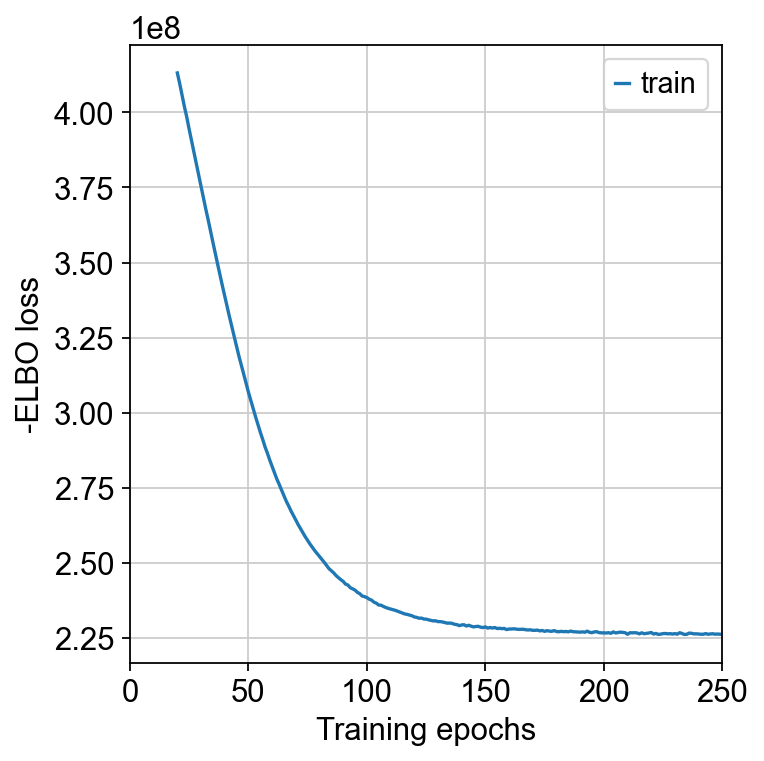

In [18]:
mod.plot_history(20)

In [22]:
# In this section, we export the estimated cell abundance (summary of the posterior distribution).
ovary_adata_sc = mod.export_posterior(
    ovary_adata_sc, sample_kwargs={'num_samples': 1000, 'batch_size': 2500, 'use_gpu': True}
)

# Save model
mod.save("./pyobjs/ovary_cell2location_sc_ref_mod_level0", overwrite=True)

# Save anndata object with results
ovary_adata_sc.write("./pyobjs/ovary_cell2location_sc_ref_Level0.h5ad")

f:\anaconda\envs\scvi-env\lib\site-packages\scvi\model\base\_pyromixin.py:388: UserWarning: `use_gpu` is deprecated in v1.0 and will be removed in v1.1. Please use `accelerator` and `devices` instead.
  _, _, device = parse_device_args(


Sampling global variables, sample: 100%|██████████| 999/999 [00:14<00:00, 66.98it/s]


In [2]:
adata_ref = sc.read_h5ad("./pyobjs/ovary_cell2location_sc_ref_Level0.h5ad")
mod = cell2location.models.RegressionModel.load(f"./pyobjs/ovary_cell2location_sc_ref_mod_level0", adata_ref, use_gpu = True)

INFO     File ./pyobjs/ovary_cell2location_sc_ref_mod_level0\model.pt already downloaded                           


f:\anaconda\envs\scvi-env\lib\site-packages\scvi\model\base\_base_model.py:676: UserWarning: `use_gpu` is deprecated in v1.0 and will be removed in v1.1. Please use `accelerator` and `devices` instead.
  _, _, device = parse_device_args(
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
f:\anaconda\envs\scvi-env\lib\site-packages\scvi\data\fields\_layer_field.py:101: UserWarning: Training will be faster when sparse matrix is formatted as CSR. It is safe to cast before model initialization.
  _verify_and_correct_data_format(adata, self.attr_name, self.attr_key)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
f:\anaconda\envs\scvi-env\lib\site-packages\lightning\pytorch\trainer\configuration_validator.py:69: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
  rank_zero_warn("You passed in a `val_da

Epoch 1/714:   0%|          | 1/714 [00:01<21:57,  1.85s/it, v_num=1]

`Trainer.fit` stopped: `max_steps=1` reached.


Epoch 1/714:   0%|          | 1/714 [00:01<22:06,  1.86s/it, v_num=1]


In [3]:
# export estimated expression in each cluster
if 'means_per_cluster_mu_fg' in adata_ref.varm.keys():
    inf_aver = adata_ref.varm['means_per_cluster_mu_fg'][[f'means_per_cluster_mu_fg_{i}'
                                    for i in adata_ref.uns['mod']['factor_names']]].copy()
else:
    inf_aver = adata_ref.var[[f'means_per_cluster_mu_fg_{i}'
                                    for i in adata_ref.uns['mod']['factor_names']]].copy()
inf_aver.columns = adata_ref.uns['mod']['factor_names']
print(inf_aver.shape)
inf_aver.iloc[0:5, 0:5]

(21975, 6)


,Immune,Granulosa,Mesenchyme,Endothelium,Epithelium
X0610006L08Rik,0.002090,0.000115,0.000426,0.000701,0.002439
X0610007P14Rik,0.436366,0.590393,0.435348,0.352473,0.628246
X0610009B22Rik,0.285987,0.552561,0.402905,0.303151,0.665022
X0610009E02Rik,0.006394,0.022815,0.019402,0.004506,0.033920
X0610009L18Rik,0.044079,0.102346,0.101453,0.049262,0.203427


In [4]:
adata_vis = sc.read_h5ad("./Integrate/adata_ovary_combined_raw_count.h5ad")
adata_vis = adata_vis[sc.read_h5ad("./Integrate/adata_ovary_combined_processed0.h5ad").obs_names]
adata_vis

View of AnnData object with n_obs × n_vars = 303411 × 19059
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'Sample'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts-AAV', 'mean_counts-AAV', 'log1p_mean_counts-AAV', 'pct_dropout_by_counts-AAV', 'total_counts-AAV', 'log1p_total_counts-AAV', 'n_cells_by_counts-CTR', 'mean_counts-CTR', 'log1p_mean_counts-CTR', 'pct_dropout_by_counts-CTR', 'total_counts-CTR', 'log1p_total_counts-CTR'
    obsm: 'spatial'

In [5]:
# find shared genes and subset both anndata and reference signatures
intersect = np.intersect1d(adata_vis.var_names, inf_aver.index)
print(len(intersect))
adata_vis = adata_vis[:, intersect].copy()
inf_aver = inf_aver.loc[intersect, :].copy()

# prepare anndata for cell2location model
cell2location.models.Cell2location.setup_anndata(adata=adata_vis, batch_key="Sample")

16455


In [6]:
# create and train the model
mod = cell2location.models.Cell2location(
    adata_vis, cell_state_df=inf_aver,
    # the expected average cell abundance: tissue-dependent
    # hyper-prior which can be estimated from paired histology:
    N_cells_per_location=1,
    # hyperparameter controlling normalisation of
    # within-experiment variation in RNA detection:
    detection_alpha=20
)
mod.view_anndata_setup()

Anndata setup with scvi-tools version 1.0.3.

Setup via `Cell2location.setup_anndata` with arguments:

{
│   'layer': None,
│   'batch_key': 'Sample',
│   'labels_key': None,
│   'categorical_covariate_keys': None,
│   'continuous_covariate_keys': None
}

         Summary Statistics          
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃     Summary Stat Key     ┃ Value  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│         n_batch          │   2    │
│         n_cells          │ 303411 │
│ n_extra_categorical_covs │   0    │
│ n_extra_continuous_covs  │   0    │
│         n_labels         │   1    │
│          n_vars          │ 16455  │
└──────────────────────────┴────────┘

               Data Registry                
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Registry Key ┃    scvi-tools Location    ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      X       │          adata.X          │
│    batch     │ adata.obs['_scvi_batch']  │
│    ind_x     │   adata.obs['_indices']   │
│    labels    │ adata.obs['_scvi_labels'] │
└──────────────┴───────────────────────────┘

                   batch State Registry                   
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃   Source Location   ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['Sample'] │    CTR     │          0          │
│                     │    AAV     │          1          │
└─────────────────────┴────────────┴─────────────────────┘

                     labels State Registry                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

In [7]:
mod.train(max_epochs=1000,
          # train using full data (batch_size=None)
          batch_size=2500,
          # use all data points in training because
          # we need to estimate cell abundance at all locations
          train_size= 1.0)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
f:\anaconda\envs\scvi-env\lib\site-packages\lightning\pytorch\trainer\configuration_validator.py:69: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
  rank_zero_warn("You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 1000/1000: 100%|██████████| 1000/1000 [8:22:51<00:00, 29.11s/it, v_num=1, elbo_train=1.01e+9]

`Trainer.fit` stopped: `max_epochs=1000` reached.


Epoch 1000/1000: 100%|██████████| 1000/1000 [8:22:51<00:00, 30.17s/it, v_num=1, elbo_train=1.01e+9]


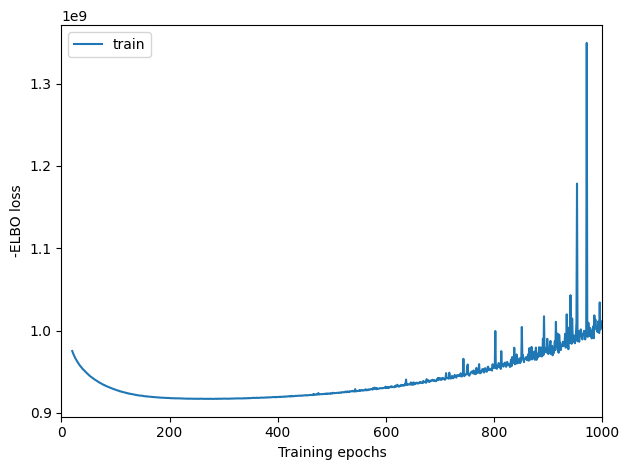

In [8]:
mod.plot_history(20)

In [10]:
# Save model
mod.save("./pyobjs/ovary_cell2location_ss_combined_mod_level0", overwrite=True)

# In this section, we export the estimated cell abundance (summary of the posterior distribution).
adata_vis = mod.export_posterior(
    adata_vis, sample_kwargs={'num_samples': 500, 'batch_size': 5000, 'use_gpu': True}
)

# Save anndata object with results
adata_vis.write("./pyobjs/ovary_cell2location_ss_combined_Level0.h5ad")

f:\anaconda\envs\scvi-env\lib\site-packages\scvi\model\base\_pyromixin.py:388: UserWarning: `use_gpu` is deprecated in v1.0 and will be removed in v1.1. Please use `accelerator` and `devices` instead.
  _, _, device = parse_device_args(


Sampling global variables, sample: 100%|██████████| 499/499 [00:14<00:00, 34.72it/s]


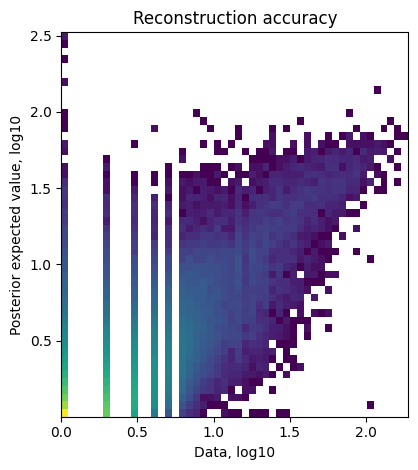

In [11]:
mod.plot_QC()

In [3]:
adata_vis = sc.read_h5ad("./pyobjs/ovary_cell2location_ss_combined_Level0.h5ad")
adata_vis
# mod = cell2location.models.Cell2location.load(f"./../pyobjs/ovary_cell2location_ss_combined_mod_level0", adata_vis, )

AnnData object with n_obs × n_vars = 303411 × 16455
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'Sample', '_indices', '_scvi_batch', '_scvi_labels'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts-AAV', 'mean_counts-AAV', 'log1p_mean_counts-AAV', 'pct_dropout_by_counts-AAV', 'total_counts-AAV', 'log1p_total_counts-AAV', 'n_cells_by_counts-CTR', 'mean_counts-CTR', 'log1p_mean_counts-CTR', 'pct_dropout_by_counts-CTR', 'total_counts-CTR', 'log1p_total_counts-CTR'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'mod'
    obsm: 'means_cell_abundance_w_sf', 'q05_cell_abundance_w_sf', 'q95_cell_abundance_w_sf', 'spatial', 'stds_cell_abundance_w_sf'

In [4]:
print(adata_vis.obsm)
adata_vis.obsm['q05_cell_proportions'] = adata_vis.obsm['q05_cell_abundance_w_sf'].div(adata_vis.obsm['q05_cell_abundance_w_sf'].sum(axis=1), axis=0)
# add 5% quantile, representing confident cell abundance, 'at least this amount is present',
# to adata.obs with nice names for plotting
adata_vis.obs["total_abundance"] = adata_vis.obsm['q05_cell_abundance_w_sf'].sum(axis = 1)
adata_vis.obs[adata_vis.uns['mod']['factor_names']] = adata_vis.obsm['q05_cell_proportions']
ct_list = list(adata_vis.uns['mod']['factor_names'])
ct_list = ["Level0_" + x for x in ct_list]
# for ct in ct_list:
#     data = adata_vis.obs[ct].values
#     adata_vis.obs[ct] = np.clip(data,0, np.quantile(data, 0.90))
adata_vis.obs["Level0_" + "max_pred"] = adata_vis.obs[adata_vis.uns['mod']['factor_names']].max(axis=1)
adata_vis.obs["Level0_" + "max_pred_celltype"] = adata_vis.obs[adata_vis.uns['mod']['factor_names']].idxmax(axis=1)

AxisArrays with keys: means_cell_abundance_w_sf, q05_cell_abundance_w_sf, q95_cell_abundance_w_sf, spatial, stds_cell_abundance_w_sf


In [17]:
adata_vis

AnnData object with n_obs × n_vars = 303411 × 16455
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'Sample', '_indices', '_scvi_batch', '_scvi_labels', 'total_abundance', 'Immune', 'Granulosa', 'Mesenchyme', 'Endothelium', 'Epithelium', 'Oocyte', 'Level0_max_pred', 'Level0_max_pred_celltype'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts-AAV', 'mean_counts-AAV', 'log1p_mean_counts-AAV', 'pct_dropout_by_counts-AAV', 'total_counts-AAV', 'log1p_total_counts-AAV', 'n_cells_by_counts-CTR', 'mean_counts-CTR', 'log1p_mean_counts-CTR', 'pct_dropout_by_counts-CTR', 'total_counts-CTR', 'log1p_total_counts-CTR'
    uns: '_scvi_uuid', '_scvi_manager_uuid', 'mod'
    obsm: 'spatial', 'means_cell_abundance_w_sf', 'stds_cell_abundance_w_sf', 'q05_cell_abundance_w_sf', 'q95_c

In [5]:
# Save anndata object with results
adata_vis.write_h5ad("./pyobjs/slideseq_cell2loc_level0.h5ad")

In [2]:
adata_vis = sc.read_h5ad("./pyobjs/slideseq_cell2loc_level0.h5ad")

In [3]:
samples_dict = {"CTR": "CTR", "AAV": "AAV"}

In [5]:
import scanpy as sc
import matplotlib.pyplot as plt

# 设置绘图参数
sc.settings.set_figure_params(dpi_save=400, fontsize=6, figsize=(3.0, 3.0), facecolor='white', frameon=False, transparent=True, vector_friendly=True, format="pdf")

# 循环绘制每个样本的空间图
for sample in samples_dict.keys():
    # 创建新的绘图
    sc.pl.spatial(adata_vis[adata_vis.obs["Sample"] == sample], cmap="Blues",
                  color=list(adata_vis.obs["Level0_max_pred_celltype"].value_counts().index), spot_size=30, 
                  ncols=6, wspace=0.2, hspace=0.2, vmin=0, vmax='p99.2', legend_fontsize=5, show=False)
    
    # 保存图形为 PDF 文件
    plt.savefig(f"figures/spatial_plot_{sample}_level0.pdf", format='pdf')

    # 关闭图形以节省内存
    plt.close()


f:\anaconda\envs\scvi-env\lib\site-packages\anndata\_core\anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


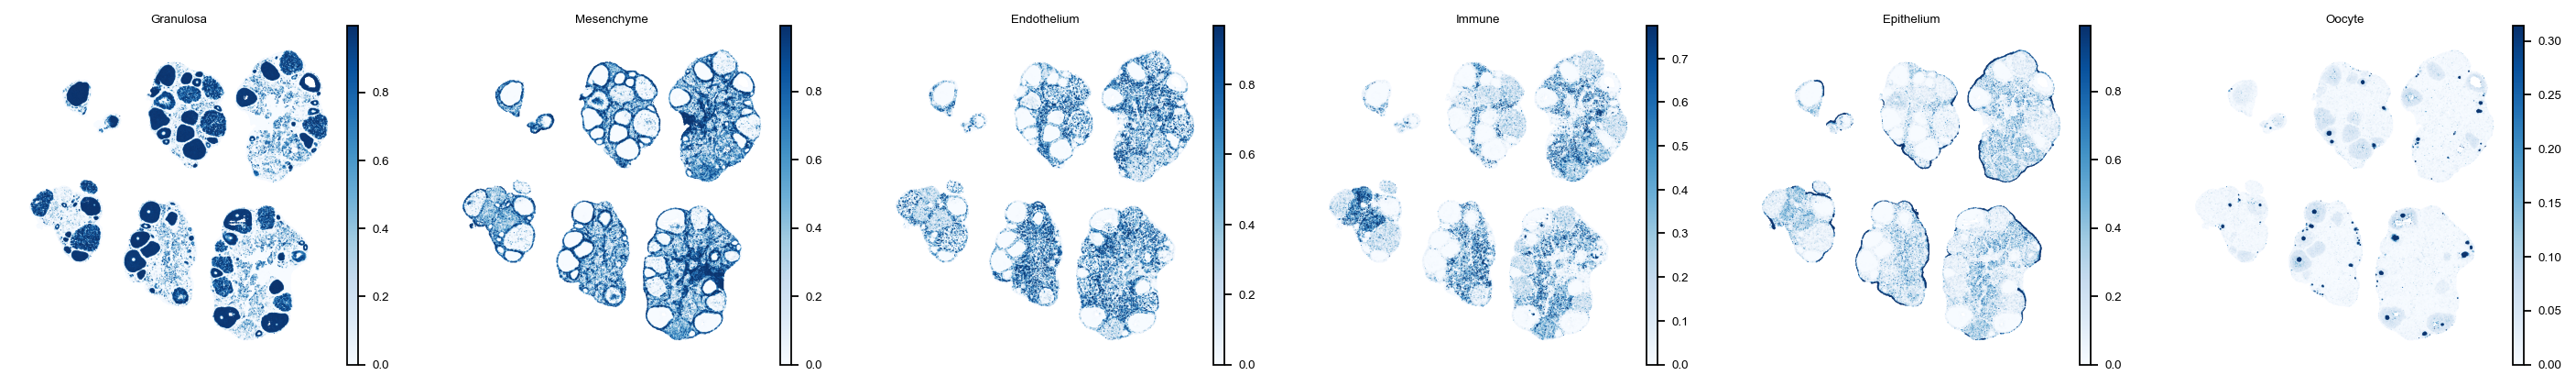

f:\anaconda\envs\scvi-env\lib\site-packages\anndata\_core\anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


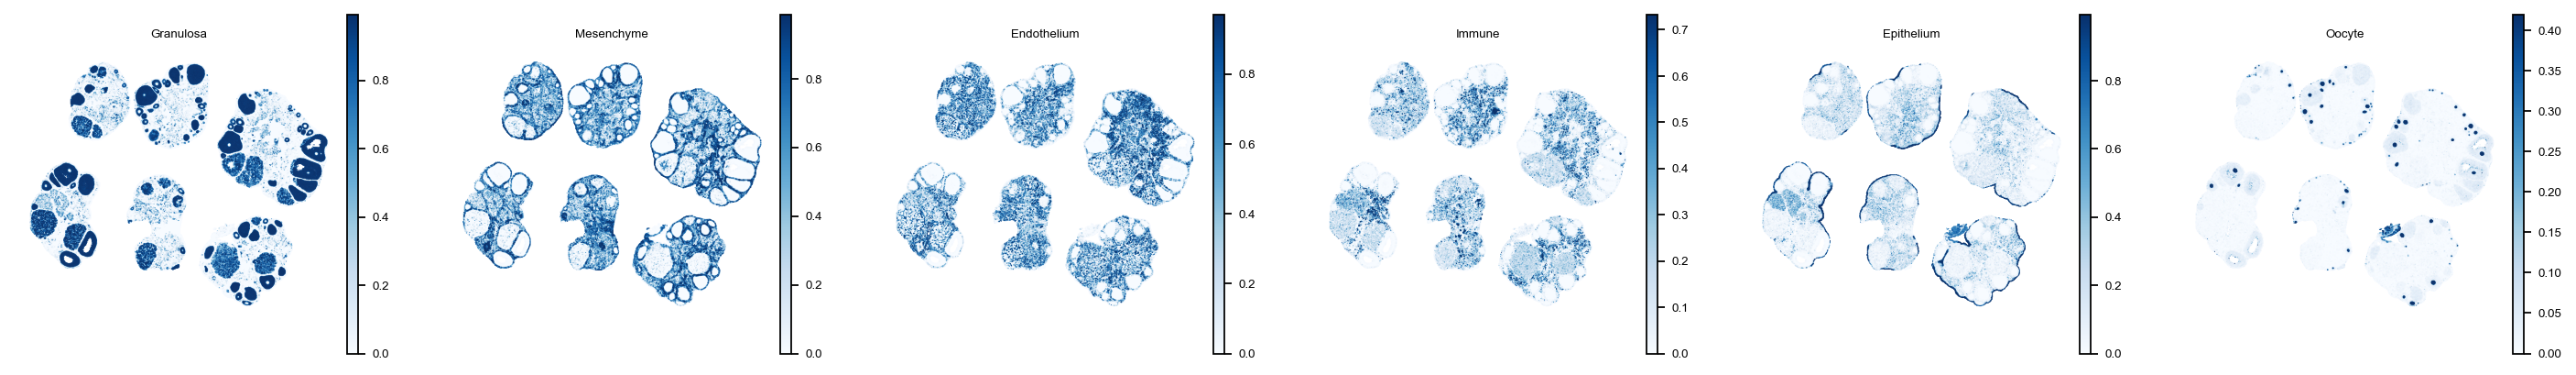

In [14]:
# plot in spatial coordinates
sc.settings.set_figure_params(dpi_save= 400, fontsize=6, figsize=(3.0, 3.0), facecolor='white', frameon=False, transparent=True, vector_friendly = True, format="pdf")
for sample in samples_dict.keys():    
    sc.pl.spatial(adata_vis[adata_vis.obs["Sample"] == sample], cmap="Blues",
                      # show first 8 cell types
                      color=list(adata_vis.obs["Level0_max_pred_celltype"].value_counts().index), spot_size= 30, 
                  ncols=6, wspace = 0.2, hspace=0.2,
                      # limit color scale at 99.2% quantile of cell abundance
                     vmin=0, vmax='p99.2', legend_fontsize=5)

In [15]:
# Compute expected expression per cell type
expected_dict = mod.module.model.compute_expected_per_cell_type(
    mod.samples["post_sample_q05"], mod.adata_manager
)

# Add to anndata layers
for i, n in enumerate(mod.factor_names_):
    adata_vis.layers["Level0_" + n] = expected_dict['mu'][i]

In [16]:
adata_vis

AnnData object with n_obs × n_vars = 303411 × 16455
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'Sample', '_indices', '_scvi_batch', '_scvi_labels', 'total_abundance', 'Immune', 'Granulosa', 'Mesenchyme', 'Endothelium', 'Epithelium', 'Oocyte', 'Level0_max_pred', 'Level0_max_pred_celltype'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts-AAV', 'mean_counts-AAV', 'log1p_mean_counts-AAV', 'pct_dropout_by_counts-AAV', 'total_counts-AAV', 'log1p_total_counts-AAV', 'n_cells_by_counts-CTR', 'mean_counts-CTR', 'log1p_mean_counts-CTR', 'pct_dropout_by_counts-CTR', 'total_counts-CTR', 'log1p_total_counts-CTR'
    uns: '_scvi_uuid', '_scvi_manager_uuid', 'mod'
    obsm: 'spatial', 'means_cell_abundance_w_sf', 'stds_cell_abundance_w_sf', 'q05_cell_abundance_w_sf', 'q95_c

In [18]:
# adata_vis.write_h5ad("./pyobjs/slideseq_cell2loc_RCTD_level0.h5ad")

In [3]:
adata_vis = sc.read_h5ad("./pyobjs/slideseq_cell2loc_RCTD_level0.h5ad")
adata_vis

AnnData object with n_obs × n_vars = 303411 × 16455
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'Sample', '_indices', '_scvi_batch', '_scvi_labels', 'total_abundance', 'Immune', 'Granulosa', 'Mesenchyme', 'Endothelium', 'Epithelium', 'Oocyte', 'Level0_max_pred', 'Level0_max_pred_celltype'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts-AAV', 'mean_counts-AAV', 'log1p_mean_counts-AAV', 'pct_dropout_by_counts-AAV', 'total_counts-AAV', 'log1p_total_counts-AAV', 'n_cells_by_counts-CTR', 'mean_counts-CTR', 'log1p_mean_counts-CTR', 'pct_dropout_by_counts-CTR', 'total_counts-CTR', 'log1p_total_counts-CTR'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'mod'
    obsm: 'means_cell_abundance_w_sf', 'q05_cell_abundance_w_sf', 'q05_cell_proportions', 'q95_cell_abundance_w

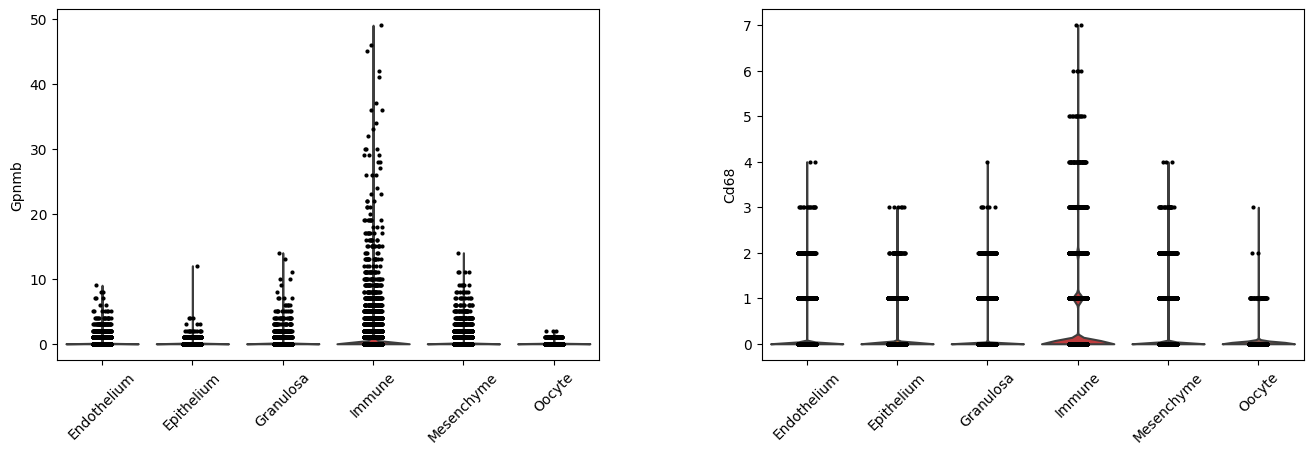

In [6]:

sc.pl.violin(adata_vis, keys=["Gpnmb","Cd68"], 
                 groupby="Level0_max_pred_celltype",
                 log=False, use_raw=None, 
                 stripplot=True, jitter=True, 
                 size=3, layer=None, scale='width', 
                 order=None, multi_panel=None, xlabel='', 
                 ylabel=None, rotation=45, show=None, save=None, ax=None)

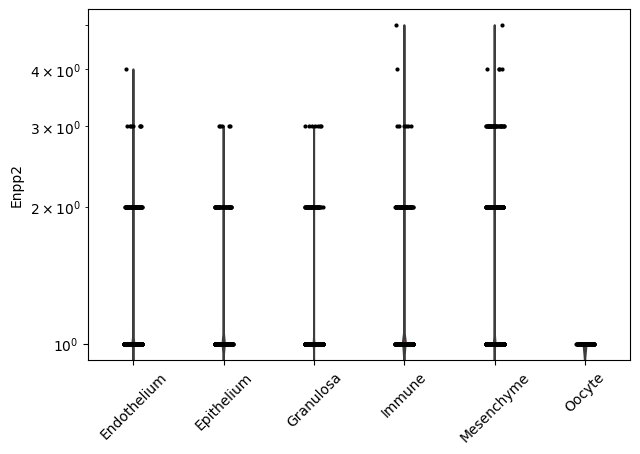

In [8]:
sc.pl.violin(adata_vis, keys=["Enpp2"], 
                 groupby="Level0_max_pred_celltype",
                 log=True, use_raw=None, 
                 stripplot=True, jitter=True, 
                 size=3, layer=None, scale='width', 
                 order=None, multi_panel=None, xlabel='', 
                 ylabel=None, rotation=45, show=None, save=None, ax=None)